# Modelo de IA em Doença Cardíaca com Kaggle

### Bruno Oliveira

## 1 - Objetivo

- Definir um problema simples de classificação binária, usando uma RNA deve-se definir a presença de doença cardíaca no paciente. É um número inteiro com valor de 0 (sem presença) a 4. Este banco de dados contém 76 atributos, mas todos os experimentos publicados referem-se ao uso de um subconjunto de 14 deles. 

## 2 - Pacotes

No código da célula abaixo é importado as bilbiotecas que serão utilizadas. Inclusive "pandas",a biblioteca que processa dados tabulados. Por fim, é impresso a versão do TensorFlow

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd #biblioteca python que processa arquivos tabulados
from sklearn.model_selection import train_test_split #divide conjunto de dados
tf.__version__

'2.3.0'

## 3 - Conjunto de dados de entrada
A célula abaixo permite ler os dados 'heart.csv', atribuíla em 'df' e posteriromente imprimir


In [6]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 4 - Identificação de erro dos dados
'VETOR DE DADOS'.describe().T permite imprimir a base dos dados de forma transposta afim de verificar possíveis erros 

In [7]:
df.describe().T#identifica se possui coluna com problema nos dados


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## 5 - Dados de treinamento e teste

### 5.1 - Dados de Entrada
As duas variáveis 'train' e 'test' recebe os dados 'df' de forma randômica (shuffle). 80% em dados de treinamento e 20% em dados de teste.

In [8]:
train_df, test_df = train_test_split(df, test_size=0.2)#automaticamente faz o shuffle=embaralhamento, divide em dados de treinamento e teste

### 5.2 - Dados de Saída
As duas variáveis 'train' e 'test' recebe apenas a coluna 'target' dos dados 'df'. Converte esses dados em matriz por meio de 'np.array'. 

In [9]:
Y_train = np.array(train_df.pop('target')) #pop retira a coluna target do cojunto de dados e tarnsforma num tensor numpy
Y_test = np.array(test_df.pop('target'))

#não se pode fornecer um data frame (df) para a entrada da rede, por isso transfama-o em um tensor (array)

### 5.3 - Impressão dos dados
Apenas para verificação, é impresso os 5 primeiros dados de treinamento

In [10]:
train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3


## 6 - Normalização dos dados
Após analisar as colunas con dados extremamente divergentes, no caso, 'age', 'trestbps', 'chol', 'thalach', deve normalizá-las para que tenham valores entre 0 e 1. 

### 6.1 - Cálculo das colunas a serem normalizadas
Primeiramente, é calculado a média e o desvio padrão de cada coluna citada acima dos dados de treinamento.

In [11]:
#normalização
mean_age = train_df['age'].mean()#calcula media
std_age = train_df['age'].std()#calcula desvio padrão

mean_trest = train_df['trestbps'].mean()#calcula media
std_trest = train_df['trestbps'].std()#calcula desvio padrão

mean_chol = train_df['chol'].mean()#calcula media
std_chol = train_df['chol'].std()#calcula desvio padrão

mean_thalach = train_df['thalach'].mean()#calcula media
std_thalach = train_df['thalach'].std()#calcula desvio padrão

### 6.2 - Cálculo de normalização
A normalização dos dados de treinamento e teste é realizada por intermédio da seguinte equação:

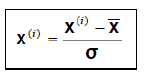

In [12]:
train_df['age'] = (train_df['age'] - mean_age)/std_age
train_df['trestbps'] = (train_df['trestbps'] - mean_trest)/std_trest
train_df['chol'] = (train_df['chol'] - mean_chol)/std_chol
train_df['thalach'] = (train_df['thalach'] - mean_thalach)/std_thalach

<ipython-input-12-523ac85bc895>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['age'] = (train_df['age'] - mean_age)/std_age
<ipython-input-12-523ac85bc895>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['trestbps'] = (train_df['trestbps'] - mean_trest)/std_trest
<ipython-input-12-523ac85bc895>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [13]:
test_df['age'] = (test_df['age'] - mean_age)/std_age
test_df['trestbps'] = (test_df['trestbps'] - mean_trest)/std_trest
test_df['chol'] = (test_df['chol'] - mean_chol)/std_chol
test_df['thalach'] = (test_df['thalach'] - mean_thalach)/std_thalach

<ipython-input-13-b76e5d2a8f75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['age'] = (test_df['age'] - mean_age)/std_age
<ipython-input-13-b76e5d2a8f75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['trestbps'] = (test_df['trestbps'] - mean_trest)/std_trest
<ipython-input-13-b76e5d2a8f75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [14]:
train_df.describe().T#transposto

,count,mean,std,min,25%,50%,75%,max
age,242.0,1.797804e-17,1.000000,-2.821638,-0.699988,0.081673,0.751668,2.203323
sex,242.0,6.735537e-01,0.469885,0.000000,0.000000,1.000000,1.000000,1.000000
cp,242.0,9.710744e-01,1.024184,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,242.0,-2.752619e-17,1.000000,-2.123629,-0.634343,-0.061541,0.511262,3.948075
chol,242.0,2.330551e-16,1.000000,-2.340246,-0.685219,-0.127072,0.532997,6.163001
fbs,242.0,1.487603e-01,0.356590,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,242.0,5.041322e-01,0.517318,0.000000,0.000000,0.000000,1.000000,2.000000
thalach,242.0,5.576347e-16,1.000000,-2.769734,-0.533693,0.181840,0.752030,2.328439
exang,242.0,3.305785e-01,0.471396,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,242.0,1.019008e+00,1.119893,0.000000,0.000000,0.600000,1.600000,5.600000


### 6.3 - Impressão dos dados normalizados
A normalização dos dados de treinamento e teste é realizada por intermédio da seguinte equação:

In [15]:
test_df.describe().T#transposto

,count,mean,std,min,25%,50%,75%,max
age,61.0,0.054214,1.076027,-2.151643,-0.923319,0.193339,0.751668,2.538321
sex,61.0,0.721311,0.452075,0.000000,0.000000,1.000000,1.000000,1.000000
cp,61.0,0.950820,1.071233,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,61.0,0.156312,1.021336,-1.665387,-0.634343,-0.061541,0.797663,3.489834
chol,61.0,-0.027139,1.038749,-2.243177,-0.806555,-0.049417,0.707721,3.153861
fbs,61.0,0.147541,0.357588,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,61.0,0.622951,0.552688,0.000000,0.000000,1.000000,1.000000,2.000000
thalach,61.0,-0.063758,1.123096,-3.529988,-0.846739,-0.131206,0.673769,2.015393
exang,61.0,0.311475,0.466940,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,61.0,1.121311,1.318852,0.000000,0.000000,0.800000,1.600000,6.200000


## 7 - Configuração da matriz de entrada 

In [16]:
X_train = np.array(train_df)
X_test = np.array(test_df)

## 8 - Pacotes de configuração da RNA

In [17]:
#TREINAR A REDE
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import initializers 

### 8.1 - Impressão da dimensão dos dados de treinamento

In [18]:
print(X_train.shape)
x_dim = X_train.shape[1] #segundo elemento o 13 - Caracteristicas do dado (colunas)

(242, 13)


## 9 - Configuração da RNA
Neste capítulo é configurado os otimizadores, as camadas da RNA, o número de neurônios e a função de ativação de cada camada. Por fim, imprime o resumo da RNA

In [19]:
#inicial = initializers.Constant(1.0) #classe no keras começa com maiúscula, inicializa todas as camadas
#inicial = initializers.GlorotNormal()#metodo Xavier
inicial = initializers.RandomUniform(minval=-1.0,maxval=1.0)


rna = Sequential()
rna.add(layers.Dense(32, activation = 'relu', kernel_initializer=inicial, input_dim=x_dim))
rna.add(layers.Dense(16, activation = 'relu', kernel_initializer=inicial))
rna.add(layers.Dense(1, activation = 'sigmoid', kernel_initializer=inicial))


rna.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


## 10 - Compilação da RNA
RNA é compilada com os dados de treinamento, validação e teste para o número de épocas determinado

In [20]:
rna.compile(optimizer = tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])#compilar a rede

history = rna.fit(X_train, Y_train, epochs=250, validation_data=(X_test, Y_test))

Epoch 1/250
8/8 [==============================] - 0s 35ms/step - loss: 5.4054 - accuracy: 0.5579 - val_loss: 6.2166 - val_accuracy: 0.4754
Epoch 2/250
8/8 [==============================] - 0s 6ms/step - loss: 4.4651 - accuracy: 0.5537 - val_loss: 5.0602 - val_accuracy: 0.4754
Epoch 3/250
8/8 [==============================] - 0s 7ms/step - loss: 3.5774 - accuracy: 0.5620 - val_loss: 4.0263 - val_accuracy: 0.4754
Epoch 4/250
8/8 [==============================] - 0s 6ms/step - loss: 2.8154 - accuracy: 0.5620 - val_loss: 3.1822 - val_accuracy: 0.4918
Epoch 5/250
8/8 [==============================] - 0s 5ms/step - loss: 2.2462 - accuracy: 0.5496 - val_loss: 2.5606 - val_accuracy: 0.4098
Epoch 6/250
8/8 [==============================] - 0s 4ms/step - loss: 1.8577 - accuracy: 0.5620 - val_loss: 2.1586 - val_accuracy: 0.4590
Epoch 7/250
8/8 [==============================] - 0s 5ms/step - loss: 1.6009 - accuracy: 0.5496 - val_loss: 1.9021 - val_accuracy: 0.4754
Epoch 8/250
8/8 [=========

8/8 [==============================] - 0s 4ms/step - loss: 0.3680 - accuracy: 0.8471 - val_loss: 0.6926 - val_accuracy: 0.7869
Epoch 60/250
8/8 [==============================] - 0s 5ms/step - loss: 0.3632 - accuracy: 0.8471 - val_loss: 0.6835 - val_accuracy: 0.7869
Epoch 61/250
8/8 [==============================] - 0s 5ms/step - loss: 0.3615 - accuracy: 0.8471 - val_loss: 0.6720 - val_accuracy: 0.7869
Epoch 62/250
8/8 [==============================] - 0s 4ms/step - loss: 0.3560 - accuracy: 0.8512 - val_loss: 0.6757 - val_accuracy: 0.7869
Epoch 63/250
8/8 [==============================] - 0s 6ms/step - loss: 0.3527 - accuracy: 0.8512 - val_loss: 0.6778 - val_accuracy: 0.7869
Epoch 64/250
8/8 [==============================] - 0s 6ms/step - loss: 0.3508 - accuracy: 0.8471 - val_loss: 0.6785 - val_accuracy: 0.7869
Epoch 65/250
8/8 [==============================] - 0s 5ms/step - loss: 0.3469 - accuracy: 0.8512 - val_loss: 0.6711 - val_accuracy: 0.7869
Epoch 66/250
8/8 [===============

8/8 [==============================] - 0s 5ms/step - loss: 0.2320 - accuracy: 0.9132 - val_loss: 0.6080 - val_accuracy: 0.7705
Epoch 118/250
8/8 [==============================] - 0s 4ms/step - loss: 0.2308 - accuracy: 0.9174 - val_loss: 0.6095 - val_accuracy: 0.7705
Epoch 119/250
8/8 [==============================] - 0s 4ms/step - loss: 0.2292 - accuracy: 0.9174 - val_loss: 0.6103 - val_accuracy: 0.7705
Epoch 120/250
8/8 [==============================] - 0s 5ms/step - loss: 0.2284 - accuracy: 0.9174 - val_loss: 0.6064 - val_accuracy: 0.7705
Epoch 121/250
8/8 [==============================] - 0s 6ms/step - loss: 0.2271 - accuracy: 0.9174 - val_loss: 0.5990 - val_accuracy: 0.7705
Epoch 122/250
8/8 [==============================] - 0s 6ms/step - loss: 0.2251 - accuracy: 0.9174 - val_loss: 0.6067 - val_accuracy: 0.7705
Epoch 123/250
8/8 [==============================] - 0s 6ms/step - loss: 0.2251 - accuracy: 0.9174 - val_loss: 0.6155 - val_accuracy: 0.7541
Epoch 124/250
8/8 [========

8/8 [==============================] - 0s 6ms/step - loss: 0.1651 - accuracy: 0.9256 - val_loss: 0.5918 - val_accuracy: 0.7705
Epoch 176/250
8/8 [==============================] - 0s 6ms/step - loss: 0.1675 - accuracy: 0.9298 - val_loss: 0.6045 - val_accuracy: 0.7541
Epoch 177/250
8/8 [==============================] - 0s 6ms/step - loss: 0.1633 - accuracy: 0.9298 - val_loss: 0.5884 - val_accuracy: 0.7705
Epoch 178/250
8/8 [==============================] - 0s 5ms/step - loss: 0.1631 - accuracy: 0.9256 - val_loss: 0.5847 - val_accuracy: 0.7705
Epoch 179/250
8/8 [==============================] - 0s 6ms/step - loss: 0.1615 - accuracy: 0.9256 - val_loss: 0.5902 - val_accuracy: 0.7705
Epoch 180/250
8/8 [==============================] - 0s 8ms/step - loss: 0.1626 - accuracy: 0.9339 - val_loss: 0.6002 - val_accuracy: 0.7541
Epoch 181/250
8/8 [==============================] - 0s 6ms/step - loss: 0.1596 - accuracy: 0.9339 - val_loss: 0.5930 - val_accuracy: 0.7541
Epoch 182/250
8/8 [========

8/8 [==============================] - 0s 4ms/step - loss: 0.1215 - accuracy: 0.9628 - val_loss: 0.6197 - val_accuracy: 0.7705
Epoch 234/250
8/8 [==============================] - 0s 5ms/step - loss: 0.1208 - accuracy: 0.9628 - val_loss: 0.6127 - val_accuracy: 0.7705
Epoch 235/250
8/8 [==============================] - 0s 5ms/step - loss: 0.1193 - accuracy: 0.9669 - val_loss: 0.6145 - val_accuracy: 0.7705
Epoch 236/250
8/8 [==============================] - 0s 4ms/step - loss: 0.1194 - accuracy: 0.9669 - val_loss: 0.6146 - val_accuracy: 0.7705
Epoch 237/250
8/8 [==============================] - 0s 5ms/step - loss: 0.1179 - accuracy: 0.9669 - val_loss: 0.6177 - val_accuracy: 0.7705
Epoch 238/250
8/8 [==============================] - 0s 5ms/step - loss: 0.1170 - accuracy: 0.9711 - val_loss: 0.6106 - val_accuracy: 0.7705
Epoch 239/250
8/8 [==============================] - 0s 5ms/step - loss: 0.1174 - accuracy: 0.9711 - val_loss: 0.6168 - val_accuracy: 0.7705
Epoch 240/250
8/8 [========

## 11 - Plotagem gráfica da compilação

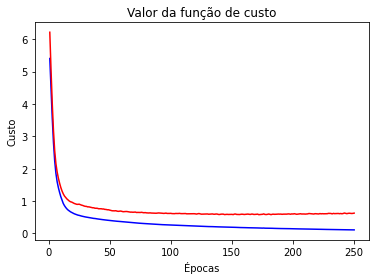

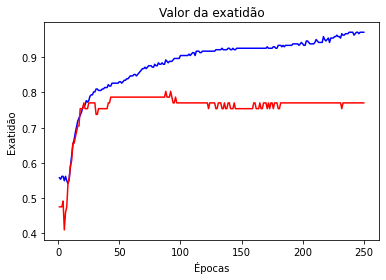

In [21]:
#fazer gráfico
# Recupera hostorico do treinamento
history_dict = history.history

# Salva custo e exatidão em vetores
custo = history_dict['loss']
exatidao = history_dict['accuracy']
val_custo = history_dict['val_loss']
val_exatidao = history_dict['val_accuracy']

# Cria vetor de épocas
epocas = range(1, len(custo) + 1)

# Gráfico do custo em funçaõ das épocas
plt.plot(epocas, custo, 'b', label='Dados treinamento')
plt.plot(epocas, val_custo, 'r', label='Dados validação')
plt.title('Valor da função de custo')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

# Gráfico da exatidão em função das épocas
plt.plot(epocas, exatidao, 'b', label='Dados treinamento')
plt.plot(epocas, val_exatidao, 'r', label='Dadosvalidação')
plt.title('Valor da exatidão')
plt.xlabel('Épocas')
plt.ylabel('Exatidão')
plt.show()


## 12 - Avaliação da RNA com 'evaluate'

In [22]:
#avaliar os dados
cm_train = rna.evaluate(X_train, Y_train)
cm_test = rna.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 0s/step - loss: 0.6282 - accuracy: 0.7705


## 13 - Previsão da RNA com os dados de teste

In [23]:
# Importa bilbioteca Numpy
import numpy as np
# Cálculo das classes previstas
y_prev = rna.predict(X_test)
classes = np.round(y_prev)

### 13.1 - Plotagem gráfica da previsão

<function matplotlib.pyplot.show(close=None, block=None)>

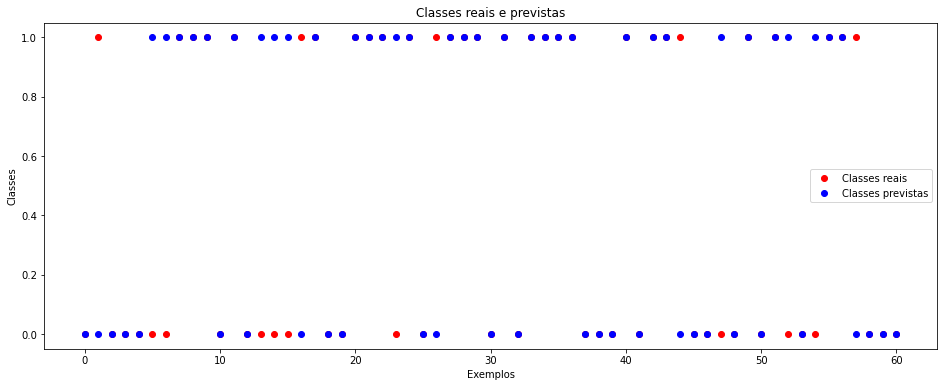

In [24]:
# Gráfico das classes reais e previstas
plt.figure(figsize=(16, 6))
plt.plot(Y_test, 'ro', label='Classes reais')
plt.plot(classes, 'bo', label='Classes previstas')
plt.title('Classes reais e previstas')
plt.xlabel('Exemplos')
plt.ylabel('Classes')
plt.legend()
plt.show